In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from skimage import io
import random
import os
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
train_dir = 'Dataset/'
types = ['Blue','Green','Red']

In [3]:
training_data = []
def training_data_generate():
    for categ in types:
        path = os.path.join(train_dir,categ)
#         class_num = types.index(categ)
        print(categ)
        for img in os.listdir(path):
            image = load_img(os.path.join(path,img),grayscale=False,target_size=(90,90,3))
            final_img = np.array(image)
            training_data.append([final_img,categ])

training_data_generate()

Blue
Green
Red


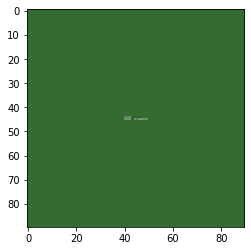

In [4]:
plt.imshow(training_data[11][0])

In [5]:
random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

Green
Blue
Green
Blue
Red
Red
Green
Green
Blue
Green


In [7]:
len(training_data)

30

In [8]:
features = []
label = []
for x , y in training_data:
    features.append(x)
    label.append(y)
features = np.array(features)

In [9]:
type(features)

numpy.ndarray

In [10]:
label[4]

'Red'

In [11]:
(features[4]).shape

(90, 90, 3)

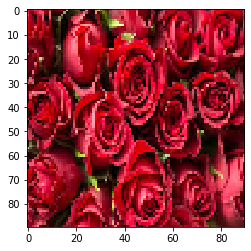

In [12]:
plt.imshow(features[4])

In [13]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
label[:] = encode.fit_transform(label[:])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features,label,test_size=0.3,random_state=10)

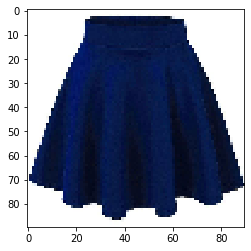

In [15]:
plt.imshow(X_train[0])

In [16]:
len(X_test)

9

In [17]:
X_train_new = X_train.reshape(21,90,90,3)
X_test_new = X_test.reshape(9,90,90,3)
X_train_new[0].shape

(90, 90, 3)

In [18]:
Y_train

[0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1]

In [19]:
Y_train_new = to_categorical(Y_train)
Y_test_new = to_categorical(Y_test)

In [20]:
Y_train_new

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [95]:
model = Sequential()
model.add(Conv2D(10,kernel_size=(5,5),activation='tanh',input_shape=(90,90,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(5,5),activation='tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(20,activation='tanh'))
model.add(Dense(3,activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 86, 86, 10)        760       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 43, 43, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        16064     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 23104)             0         
__________

In [96]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
Model = model.fit(X_train_new,Y_train_new,validation_data=(X_test,Y_test_new),epochs=16,batch_size=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 21 samples, validate on 9 samples
Epoch 1/16





21/21 [==============================] - 3s 149ms/step - loss: 1.5704 - acc: 0.6190 - val_loss: 1.0710 - val_acc: 0.3333
Epoch 2/16
21/21 [==============================] - 1s 33ms/step - loss: 0.4731 - acc: 0.7143 - val_loss: 0.5080 - val_acc: 0.6667
Epoch 3/16
21/21 [==============================] - 1s 32ms/step - loss: 0.3544 - acc: 0.9048 - val_loss: 0.4418 - val_acc: 0.7778
Epoch 4/16
21/21 [==============================] - 1s 36ms/step - loss: 0.3355 - acc: 0.9048 - val_loss: 0.2983 - val_acc: 0.8889
Epoch 5/16
21/21 [==============================] - 1s 31ms/step - loss: 0.2681 - acc: 0.8571 - val_loss: 0.6072 - val_acc: 0.5556
Epoch 6/16
21/21 [==============================] - 1s 28ms/step - loss: 0.2450 - acc: 0.8571 - val_loss: 0.6816 - val_acc: 0.7778
Epoch 7/16
21/21 [==============================] - 1s 30ms/step - l

In [25]:
_,train = model.evaluate(X_train_new,Y_train_new)
_,test = model.evaluate(X_test_new,Y_test_new)
print('Test: {}\n Train: {}'.format(test,train))

9/9 [==============================] - 0s 7ms/step
Test: 1.0
 Train: 1.0


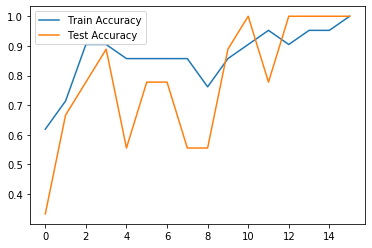

In [26]:
plt.plot(Model.history['acc'],label='Train Accuracy')
plt.plot(Model.history['val_acc'],label='Test Accuracy')
plt.legend()

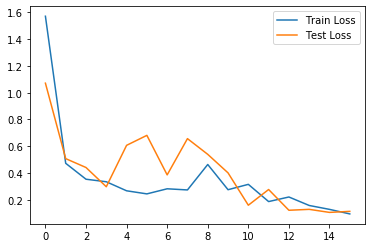

In [27]:
plt.plot(Model.history['loss'],label='Train Loss')
plt.plot(Model.history['val_loss'],label='Test Loss')
plt.legend()

In [99]:
model.save('ColorClassificationNN.pickle')

In [100]:
model.save_weights('ColorClassificationNN.weights')

### Prediction!

Input image:


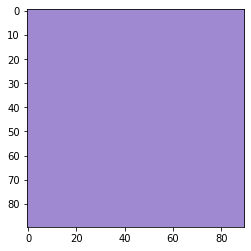

Predicted Color: Blue


In [87]:
image = load_img('violet.png',target_size=(90,90))
img = np.array(image)
print('Input image:')
plt.imshow(img)
x = np.expand_dims(img,axis=0)
predict = model.predict_classes(x)
predict = types[int(predict)]
plt.show()
print('Predicted Color: {}'.format(predict))

Input image:


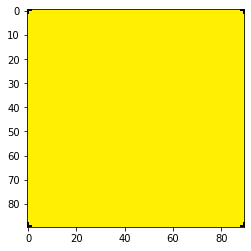

Predicted Color: Green


In [88]:
image = load_img('Yellow.png',target_size=(90,90))
img = np.array(image)
print('Input image:')
plt.imshow(img)
x = np.expand_dims(img,axis=0)
predict = model.predict_classes(x)
predict = types[int(predict)]
plt.show()
print('Predicted Color: {}'.format(predict))

Input image:


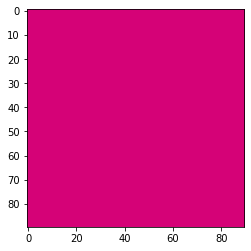

Predicted Color: Red


In [89]:
image = load_img('magenta.jpg',target_size=(90,90))
img = np.array(image)
print('Input image:')
plt.imshow(img)
x = np.expand_dims(img,axis=0)
predict = model.predict_classes(x)
predict = types[int(predict)]
plt.show()
print('Predicted Color: {}'.format(predict))

Input image:


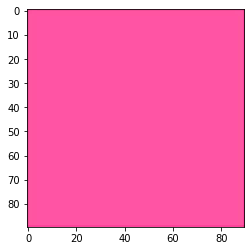

Predicted Color: Green


In [90]:
image = load_img('rose.png',target_size=(90,90))
img = np.array(image)
print('Input image:')
plt.imshow(img)
x = np.expand_dims(img,axis=0)
predict = model.predict_classes(x)
predict = types[int(predict)]
plt.show()
print('Predicted Color: {}'.format(predict))

Input image:


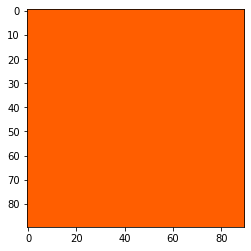

Predicted Color: Red


In [91]:
image = load_img('orange.png',target_size=(90,90))
img = np.array(image)
print('Input image:')
plt.imshow(img)
x = np.expand_dims(img,axis=0)
predict = model.predict_classes(x)
predict = types[int(predict)]
plt.show()
print('Predicted Color: {}'.format(predict))

Input image:


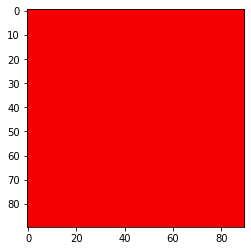

Predicted Color: Red


In [94]:
image = load_img('red.png',target_size=(90,90))
img = np.array(image)
print('Input image:')
plt.imshow(img)
x = np.expand_dims(img,axis=0)
predict = model.predict_classes(x)
predict = types[int(predict)]
plt.show()
print('Predicted Color: {}'.format(predict))

Input image:


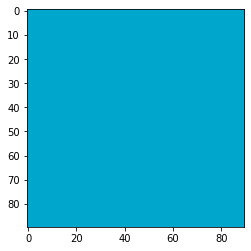

Predicted Color: Blue


In [93]:
image = load_img('cyan dark.png',target_size=(90,90))
img = np.array(image)
print('Input image:')
plt.imshow(img)
x = np.expand_dims(img,axis=0)
predict = model.predict_classes(x)
predict = types[int(predict)]
plt.show()
print('Predicted Color: {}'.format(predict))

In [127]:
(np.array(load_img('Dataset/Blue/10.jpg'))).shape

(345, 263, 3)